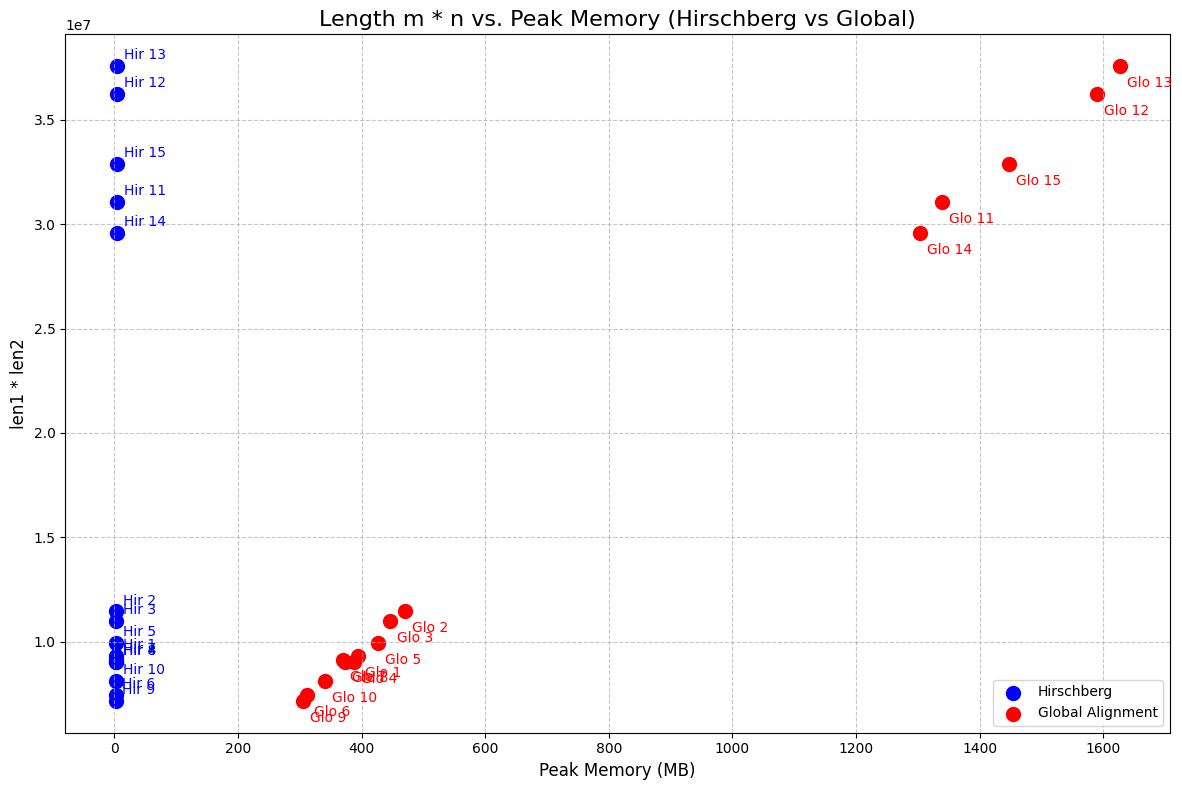

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
hir_df = pd.read_csv('results/hir_mut_results.csv')
glo_df = pd.read_csv('results/glo_mut_results.csv')
seq_df = pd.read_csv('dataset/mutated_sequences.csv')

# Extract sequence lengths
len1_1 = len(seq_df.iloc[0, 0])
len1_2 = len(seq_df.iloc[5, 0])
len1_3 = len(seq_df.iloc[10, 0])

# Calculate y-axis values (len1 * len2) for all alignments
y_values = []
for i in range(15):
    if i < 5:
        y_values.append(len1_1 * len(seq_df.iloc[i, 1]))
    elif i < 10:
        y_values.append(len1_2 * len(seq_df.iloc[i, 1]))
    else:
        y_values.append(len1_3 * len(seq_df.iloc[i, 1]))

# Extract x-axis values (Peak Memory) for Hirschberg and Global
hir_x_values = hir_df['Peak Memory (MB)'].tolist()[:15]
glo_x_values = glo_df['Peak Memory (MB)'].tolist()[:15]

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Plot Hirschberg results
plt.scatter(hir_x_values, y_values, color='blue', s=100, label='Hirschberg')

# Plot Global Alignment results
plt.scatter(glo_x_values, y_values, color='red', s=100, label='Global Alignment')

# Customize the plot
plt.title('Length m * n vs. Peak Memory (Hirschberg vs Global)', fontsize=16)
plt.xlabel('Peak Memory (MB)', fontsize=12)
plt.ylabel('len1 * len2', fontsize=12)

# Add labels for each point in both series
for i, (x, y) in enumerate(zip(hir_x_values, y_values)):
    plt.annotate(f'Hir {i+1}', (x, y), xytext=(5, 5), 
                 textcoords='offset points', color='blue')
for i, (x, y) in enumerate(zip(glo_x_values, y_values)):
    plt.annotate(f'Glo {i+1}', (x, y), xytext=(5, -15), 
                 textcoords='offset points', color='red')

# Add legend
plt.legend()

# Improve layout
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()
